<a href="https://colab.research.google.com/github/lanyu0322/phd_semester1/blob/master/Parks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive")




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install geopandas

     |████████████████████████████████| 901kB 2.8MB/s 
     |████████████████████████████████| 9.8MB 41.1MB/s 
     |████████████████████████████████| 17.9MB 35.5MB/s 
  Created wheel for munch: filename=munch-2.3.2-py2.py3-none-any.whl size=6614 sha256=3cdeeb70b9b65227b90d27ff1c755953e3f57059250d3608b844954835a166cf
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built munch


In [0]:
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import pyproj as proj
fname = "drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp"

data = gp.read_file(fname)
data.head()


,acquisitio,acres,address,borough,class,commission,communityb,councildis,department,eapply,gisobjid,gispropnum,global_id,jurisdicti,location,mapped,name311,nys_assemb,nys_senate,objectid,omppropid,parentid,permit,permitdist,permitpare,pip_ratabl,precinct,retired,signname,subcategor,typecatego,url,us_congres,waterfront,zipcode,geometry
0,19440801000000.00000,0.991,None,M,PLGD,20100106000000.00000,111,9,M-11,Abraham Lincoln Playground,100004131.0,M193,{5D62AD38-AE30-4E43-8DE0-E28780CD8E3C},DPR,5 Ave. and E. 135 St.,False,Abraham Lincoln Playground,70,30,5834.0,M193,M-11,Y,M-11,M-11,Yes,25,False,Abraham Lincoln Playground,Neighborhood Plgd,Community Park,http://www.nycgovparks.org/parks/M193/,13,No,10037,POLYGON ((-73.93682693707335 40.81184552631012...
1,None,0.030,None,Q,PARK,20090423000000.00000,413,23,Q-13,Father Reilly Square,100000216.0,Q159,{12B62C23-3F42-418E-B059-F0B549D7FCEB},DPR/CDOT,"Winchester Blvd., 93 Ave., 220 St.",False,Father Reilly Square,33,14,6166.0,Q159,Q-13,Y,Q-13,Q-13,Yes,105,False,Father Reilly Square,Sitting Area/Triangle/Mall,Triangle/Plaza,http://www.nycgovparks.org/parks/Q159/,5,No,11428,POLYGON ((-73.73628053979716 40.72267578865961...
2,19360824000000.00000,0.911,2300 Ryer Avenue,X,PARK,20100106000000.00000,205,15,X-05,Slattery Playground,100004208.0,X085,{01AD9F2D-AD1B-4FBE-BB15-41DC9DC485FD},DPR,E. 183 St. bet. Valentine Ave. and Ryer,False,Slattery Playground,86,33,4792.0,X085,X-05,Y,X-05,X-05,Yes,46,False,Slattery Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/X085/,15,No,10458,POLYGON ((-73.89825077067158 40.85693358482933...
3,19520206000000.00000,0.189,349 RODNEY STREET,B,PARK,20100106000000.00000,301,34,B-01,Rodney Playground Center,100003716.0,B223PD,{F14C1976-8BEC-49F1-A139-798EA720A52E},DPR,"Rodney St., S. 3 St., Borniquen Pl.",True,Rodney Playground Center,53,18,5124.0,B223PD,B-01,Y,B-01,B-01,Yes,90,False,Rodney Playground Center,Sitting Area/Triangle/Mall,Neighborhood Park,http://www.nycgovparks.org/parks/B223PD/,7,No,11211,POLYGON ((-73.95533291494969 40.71042213200856...
4,19240403000000.00000,0.554,124 11 STREET,B,PARK,20110712000000.00000,306,39,B-06,Ennis Playground,100004454.0,B095,{B2FA7ABF-7ECB-4847-8979-0DD773A819F8},DPR,"11 St., 12 St. bet. 2 Ave. and 3 Ave.",False,Ennis Playground,51,25,5456.0,B095,B-06,Y,B-06,B-06,Yes,78,False,Ennis Playground,Neighborhood Plgd,Playground,http://www.nycgovparks.org/parks/B095/,7,No,11215,POLYGON ((-73.99424820391394 40.67057586455565...


In [0]:
#1. read in the parks shapefile (call the resultant geodataframe "parks") and convert to NY state plane coords

parks = gp.GeoDataFrame.from_file(fname)


park = parks.to_crs(epsg=2263)   # 2263 ny state reference coordinate 

# parks.to_crs(epsg=2263).head()
# park = parks.to_crs(epsg=2263)


#2. pick a random lat/lon and define a point of radius 200 feet.  call it circ
# -- get centroid coordinates
cenx = park["geometry"].centroid.x.values
ceny = park["geometry"].centroid.y.values

from shapely.geometry import Point                                                           #调用numpy库里定义好的Point类
# -- pick a random centroid
np.random.seed(114)
                                                                                             # seed() 用于指定随机数生成时所用算法开始的整数值,括号内有数字表示固定的 
                                                                                             # 1.如果使用相同的seed( )值，则每次生成的随即数都相同：在括号里写一个固定值，下面的np.random.randint(xxx) 都是同一个值
ind = np.random.randint(len(cenx))
xr = cenx[ind]
yr = ceny[ind]
circle = Point(xr,yr).buffer(200)


# #3. note that parks.geometries has a method called .intersection.  use that to get the sum of all the area within circ 
# #(i.e., the sum of all areas of parks properties that intersect circ


intersection_parks = park.geometry.intersection(circle)                                      #intersection()后返回的还是PolyGON的类型
result = intersection_parks.area.sum() 
print(result)

                                                                                             #result = (intersection_parks.area > 0).sum() #.area 应该是这种gis的 polygon数据类型里的一个方法可以直接计算他的面积
                                                                                             # 但是 (intersection_parks.area > 0) 其实返回的是一系列 这样的集合
#Question：sum(list)  vs   list.sum()  ?                                                       # (intersection_parks.area > 0).head(): [False, False, True, False, ...]
                                                                                              # 其实就是列出了是否这个多边形与那个Point的交集面积是大于0的的一个true/false的集合，然后python里面true默认=1， false默认值是0，所以你sum他们起来其实是sum了与这个Point有交集的多边形的个数，而不是面积的和
                                                                                              # 所以如果算个数，这样可以，如果要算面积，直接写成 result = intersection_parks.area.sum() 
# google covert geodatafram to raster




1935.881091729236


Functions take the following form:

In [0]:
def myfunc(in0, in1, in2, kw0=None, kw1=5.0):
  # do something with in0, in1, in2
  
  # return value or just return

  print("settings are: ", in0, in1, in2, kw0, kw1)
  
  val = in0 + in1

  return val

To call that function, I could write:

In [0]:
foo = myfunc(0, 1, 2)
myfunc(0, 1, 2, kw0=3)
myfunc(0, 1, 2, kw0=3, kw1=4)
myfunc(0, 1, 2, kw1=4)

settings are:  0 1 2 None 5.0
settings are:  0 1 2 3 5.0
settings are:  0 1 2 3 4
settings are:  0 1 2 None 4


1

In [0]:
foo

1

In [0]:
!pip install geopandas

In [0]:
import time
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
import pyproj
from shapely.geometry import Point  


Here's a skeleton for the function:

reading the parks properties file...
  read in 0.5241777896881104s
converting properties to NYSP...
  converted in 0.8159091472625732s
reading camera lat/lon...
  read in 0.0016942024230957031s
converting camera lat/lon to NYSP...
  converted in 0.009881258010864258s
finding enclosed greenspace for 500ft for all cams...
  working on 0 of 281 [0.0s]
  working on 20 of 281 [2.01s]
  working on 40 of 281 [3.86s]
  working on 60 of 281 [5.74s]
  working on 80 of 281 [7.61s]
  working on 100 of 281 [9.54s]
  working on 120 of 281 [11.45s]
  working on 140 of 281 [13.31s]
  working on 160 of 281 [15.19s]
  working on 180 of 281 [17.11s]
  working on 200 of 281 [18.97s]
  working on 220 of 281 [20.83s]
  working on 240 of 281 [22.7s]
  working on 260 of 281 [24.63s]
  working on 280 of 281 [26.5s]
  enclosed area found in 26.593130826950073s


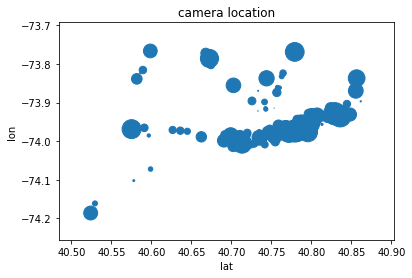

In [0]:
#2. Write a function that takes as input: parks properties geodataframe, lat/lon of cameras, and the radius; and returns, sq-ft of park space.
 #Run that function and get the sq-ft of parkspace within a radii of 100, 200, 500, 1000, 2000, 5000
  ## CODE TO CALCULATE ENCLOSED PARKS AREA
def available_greenspace(geometry, lat, lon, rad):
  circle = Point(lat,lon).buffer(rad)
  parea = geometry.intersection(circle)   
  result = parea.area.sum()
  return result

#intersection_parks = park.geometry.intersection(circle)     
# -- Read parks properties
#props = READ IN THE PROPOERTIES FILE
fname = "drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp"

#read the godataframe and # -- Convert to NYSP coords
print("reading the parks properties file...")
t0 = time.time()
park = gp.GeoDataFrame.from_file(fname)
print("  read in {0}s".format(time.time() - t0))

print("converting properties to NYSP...")
t0 = time.time()
park = park.to_crs(epsg=2263) 
gemo = park['geometry']
print("  converted in {0}s".format(time.time() - t0))


print("reading camera lat/lon...")
t0 = time.time()
lname = "drive/My Drive/lwir/data/nycdot/cams_latlon.npy"
latlon = np.load(lname)
# len(latlon) #281
print("  read in {0}s".format(time.time() - t0))

def latlon_to_ny(lat, lon):
    """ lat/lon to NYS """

    proj = pyproj.Proj(init="epsg:2263", preserve_units=True)
    result = proj(lon, lat)

    return result


print("converting camera lat/lon to NYSP...")
t0 = time.time()
ny_lat, ny_lon = latlon_to_ny(latlon[:, 0], latlon[:, 1])
ny_latlon = np.vstack((ny_lat, ny_lon)).T
print("  converted in {0}s".format(time.time() - t0))



rad = 500.
print("finding enclosed greenspace for {0}ft for all cams...".format(round(int(rad))))
t0 = time.time()
area_size = []

for i in range(ny_latlon.shape[0]): #for in in range(len(latton))
  if i % 20 == 0:
    print("  working on {0} of {1} [{2}s]".format(i, ny_latlon.shape[0], 
                                                 round(time.time() - t0, 2)))

  tarea = available_greenspace(gemo, ny_latlon[i][0], ny_latlon[i][1], rad)
  area_size.append(tarea)

area_size = np.array(area_size)
 
print("  enclosed area found in {0}s".format(time.time() - t0))

# -- for 500 sq-ft make a scatterplot of the camera locations where the 
#    marker size is proportional to the amount of enclosed park area
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# area_size = [0.123, 345, 23243453, 0.2324, 1.3434, ...]
plt.title('camera location')
plt.xlabel('lat')
plt.ylabel('lon')

plt.scatter(latlon[:, 0], latlon[:, 1], area_size * 0.001)

# for i in range(281):
#   marker_size=area_size[i] * 0.001 # multiply 0.001 to narrow the points
#   plt.scatter(latlon[i, 0],latlon[i, 1], marker_size)

  





In [0]:
ny_latlon_lan = []
for i in range(281):
  latlon_ny = latlon_to_ny(latlon[i, 0], latlon[i, 1])
  ny_latlon_lan.append(latlon_ny)

In [0]:
print(ny_latlon_lan[0], ny_latlon[0])

(1035503.9260239793, 208547.57769739188) [1035503.92602398  208547.57769739]


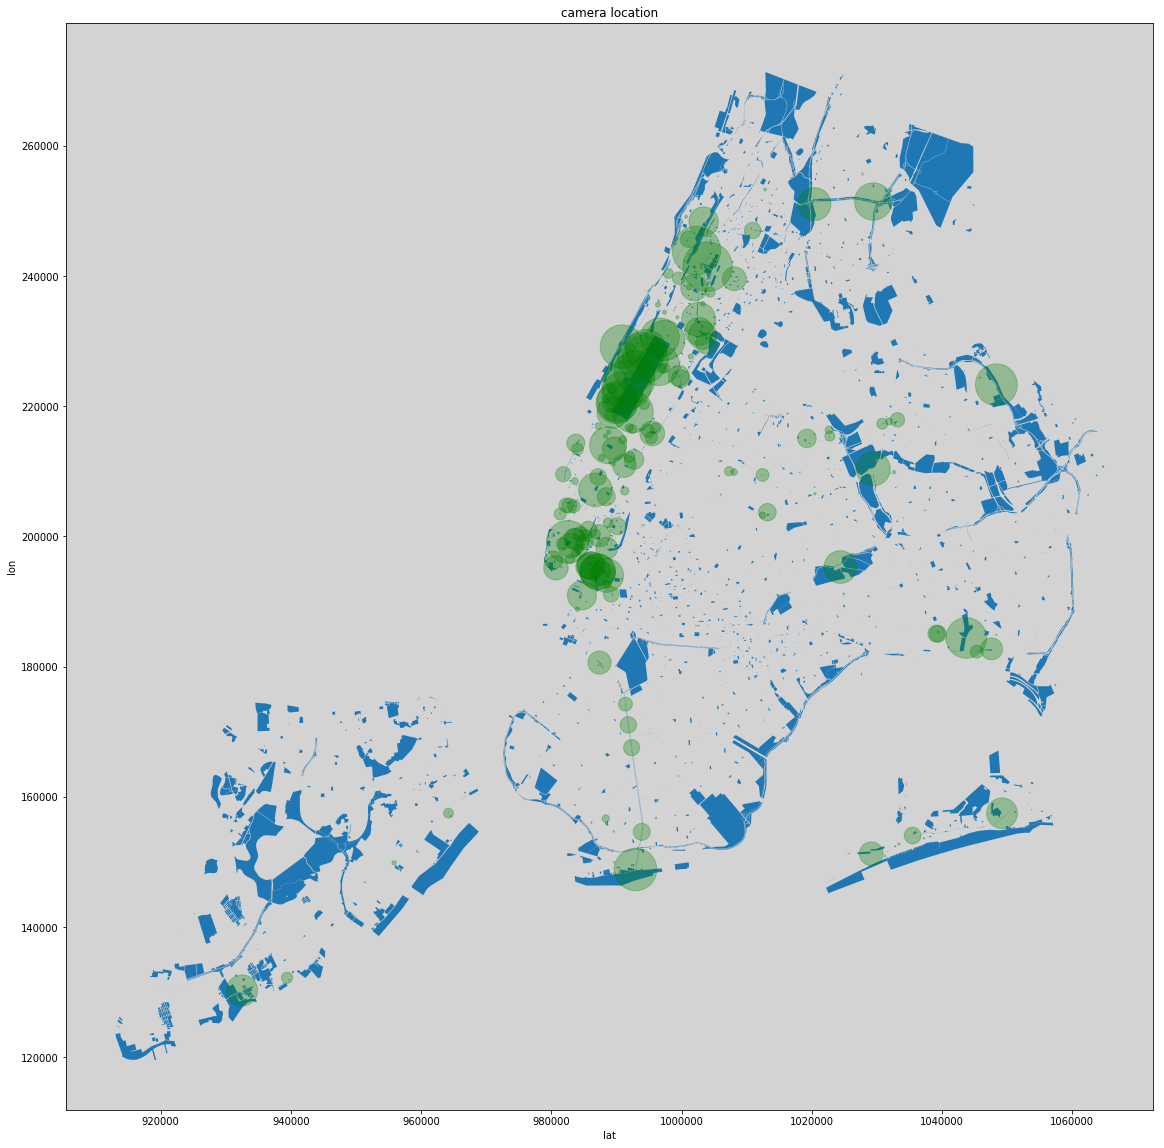

In [0]:
# area_size = [0.123, 345, 23243453, 0.2324, 1.3434, ...]
fig, ax = plt.subplots(figsize=(20, 20))

ax.set_title('camera location')
ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_facecolor("lightgray")

park.plot(ax=ax)
ax.scatter(ny_latlon[:, 0], ny_latlon[:, 1], area_size * 0.005, alpha=0.3, c="green")


In [0]:
ny_latlon.shape[0]

281

reading the parks properties file...
  read in 0.5402534008026123s
converting properties to NYSP...
  converted in 0.8732016086578369s
reading camera lat/lon...
  read in 0.0022242069244384766s
converting camera lat/lon to NYSP...
  converted in 2.5727808475494385s
finding enclosed greenspace for 500ft for all cams...
  enclosed area found in 26.24933385848999s


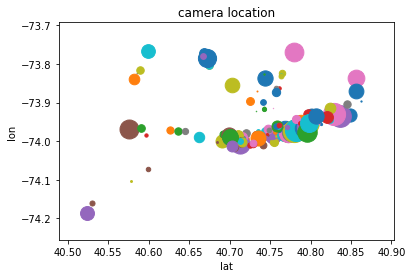

In [0]:

#2. Write a function that takes as input: parks properties geodataframe, lat/lon of cameras, and the radius; and returns, sq-ft of park space.
 #Run that function and get the sq-ft of parkspace within a radii of 100, 200, 500, 1000, 2000, 5000
  ## CODE TO CALCULATE ENCLOSED PARKS AREA
def available_greenspace(geometry, lat, lon, rad):

  circle = Point(lat, lon).buffer(rad)
  parea  = geometry.intersection(circle)   
  result = parea.area.sum()

  return result


#intersection_parks = park.geometry.intersection(circle)     
# -- Read parks properties
#props = READ IN THE PROPOERTIES FILE
fname = "drive/My Drive/lwir/data/parks/properties/geo_export_5b605687-0f81-4fe4-9fb7-ec27cd43ab5f.shp"

#read the godataframe and # -- Convert to NYSP coords
print("reading the parks properties file...")
t0 = time.time()
park = gp.GeoDataFrame.from_file(fname)
print("  read in {0}s".format(time.time() - t0))

print("converting properties to NYSP...")
t0 = time.time()
park = park.to_crs(epsg=2263) 
gemo = park['geometry']
print("  converted in {0}s".format(time.time() - t0))



# print(gemo)
# -- Read in the camera lat/lon
#fname = FILENAME OF CAMERA LAT/LON FILE
#latlon = np.load(fname)

print("reading camera lat/lon...")
t0 = time.time()
lname = "drive/My Drive/lwir/data/nycdot/cams_latlon.npy"
latlon = np.load(lname)
# len(latlon) #281
print("  read in {0}s".format(time.time() - t0))


# def nylatlon(lat, lon):
#     """ lat/lon to NYS """
#     proj = pyproj.Proj(init="epsg:2263")
#     result = proj(lat, lon)
#     return result #cannot use print(result) because result will be (139899416.1674371, -12612377.437095003) None None
  
def latlon_to_ny(lat, lon):
    """ lat/lon to NYS """

    proj = pyproj.Proj(init="epsg:2263", preserve_units=True)
    result = proj(lon, lat)

    return result

print("converting camera lat/lon to NYSP...")
t0 = time.time()
ny_latlon = []
for i in range(281):
  latlon_ny = latlon_to_ny(latlon[i, 0], latlon[i, 1])
  ny_latlon.append(latlon_ny)
print("  converted in {0}s".format(time.time() - t0))
 
  
# -- For each camera lat/lon calcualte enclosed area for radius of 500ft
# YOU'LL WANT TO LOOP THROUGH ALL CAMERA LAT/LON.  ONE ITERATION WILL LOOK SOMETHING LIKE
print("finding enclosed greenspace for 500ft for all cams...")
t0 = time.time()
area_size = []
for i in range(281): #for in in range(len(latton))
  tarea = available_greenspace(gemo, ny_latlon[i][0], ny_latlon[i][1], 500.)
  area_size.append(tarea)
print("  enclosed area found in {0}s".format(time.time() - t0))
  
# # -- Calculate enclosed area for 100, 200, 500, 1000, 2000, 5000 sq-ft
# farea_size = []
# for i in range(281): #for in in range(len(latton))
#   farea = available_greenspace(gemo, ny_latlon[i][0], ny_latlon[i][1], 100.)
#   farea_size.append(farea)

# garea_size = []
# for i in range(281): #for in in range(len(latton))
#   garea = available_greenspace(gemo, ny_latlon[i][0], ny_latlon[i][1], 200.)
#   garea_size.append(garea)
  
# iarea_size = []
# for i in range(281): #for in in range(len(latton))
#   iarea = available_greenspace(gemo, ny_latlon[i][0], ny_latlon[i][1], 1000.)
#   iarea_size.append(iarea)

# jarea_size = []
# for i in range(281): #for in in range(len(latton))
#   jarea = available_greenspace(gemo, ny_latlon[i][0], ny_latlon[i][1], 2000.)
#   jarea_size.append(jarea)
  
  
# karea_size = []
# for i in range(281): #for in in range(len(latton))
#   karea = available_greenspace(gemo, ny_latlon[i][0], ny_latlon[i][1], 5000.)
#   karea_size.append(karea)
  
  
# -- for 500 sq-ft make a scatterplot of the camera locations where the 
#    marker size is proportional to the amount of enclosed park area
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# area_size = [0.123, 345, 23243453, 0.2324, 1.3434, ...]
plt.title('camera location')
plt.xlabel('lat')
plt.ylabel('lon')

for i in range(281):
  marker_size=area_size[i] * 0.001 # multiply 0.001 to narrow the points
  plt.scatter(latlon[i, 0],latlon[i, 1], marker_size)

  





In [0]:
area_size

[0.0,
 979.8064743176856,
 0.0,
 45023.62456460086,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 58445.16428738835,
 0.0,
 19998.479163659733,
 0.0,
 0.0,
 27738.52437648816,
 0.0,
 0.0,
 106125.95056684192,
 55087.99869758377,
 0.0,
 8320.291016319372,
 0.0,
 275257.69398205954,
 0.0,
 0.0,
 157510.83975452487,
 66006.33318213576,
 0.0,
 160457.4507086348,
 0.0,
 5065.4175646376825,
 0.0,
 0.0,
 0.0,
 774.7542460965503,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 3181.931609328875,
 15459.035162358396,
 0.0,
 0.0,
 0.0,
 0.0,
 9901.365924108217,
 0.0,
 0.0,
 0.0,
 0.0,
 107791.03341599465,
 514710.04717474314,
 6959.067569210872,
 85853.0714735885,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 89724.2388952635,
 0.0,
 46133.939657332485,
 76137.13705631309,
 23405.802278549065,
 0.0,
 32399.135984912533,
 5048.691858165191,
 0.0,
 0.0,
 0.0,
 0.0,
 65605.86242678041,
 23.604972735422823,
 0.0,
 0.0,
 0.0,
 341611.1816233444,
 340411.0756514045,
 0.0,
 0.0,
 337377.13809223304,
 119475.6375219297,
 31554.4016